In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
df_train = pd.read_csv('sign_mnist_train[1].csv')
df_test = pd.read_csv('sign_mnist_test[1].csv')

In [7]:
df_train.shape

(27455, 785)

In [8]:
df_test.shape

(7172, 785)

In [9]:
df_train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

In [10]:
df_train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

In [11]:
df_test.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 785 columns]

In [12]:
df_train['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

<Axes: >

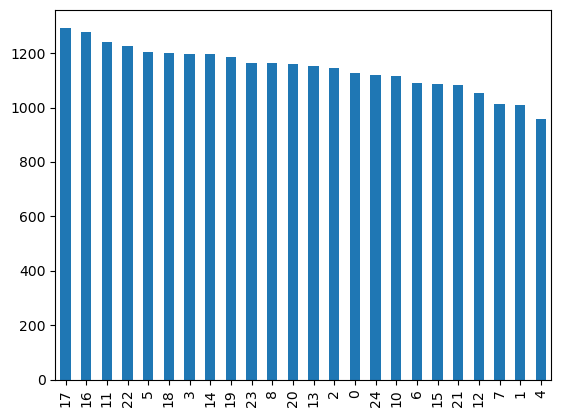

In [13]:
df_train['label'].value_counts().plot(kind='bar')

In [14]:
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sign_mnist_test.cssign_mnist_test[1].csvv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('sign_mnist_test[1].csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 785 columns


C:\Users\ashis\AppData\Local\Temp\ipykernel_25652\2217798891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


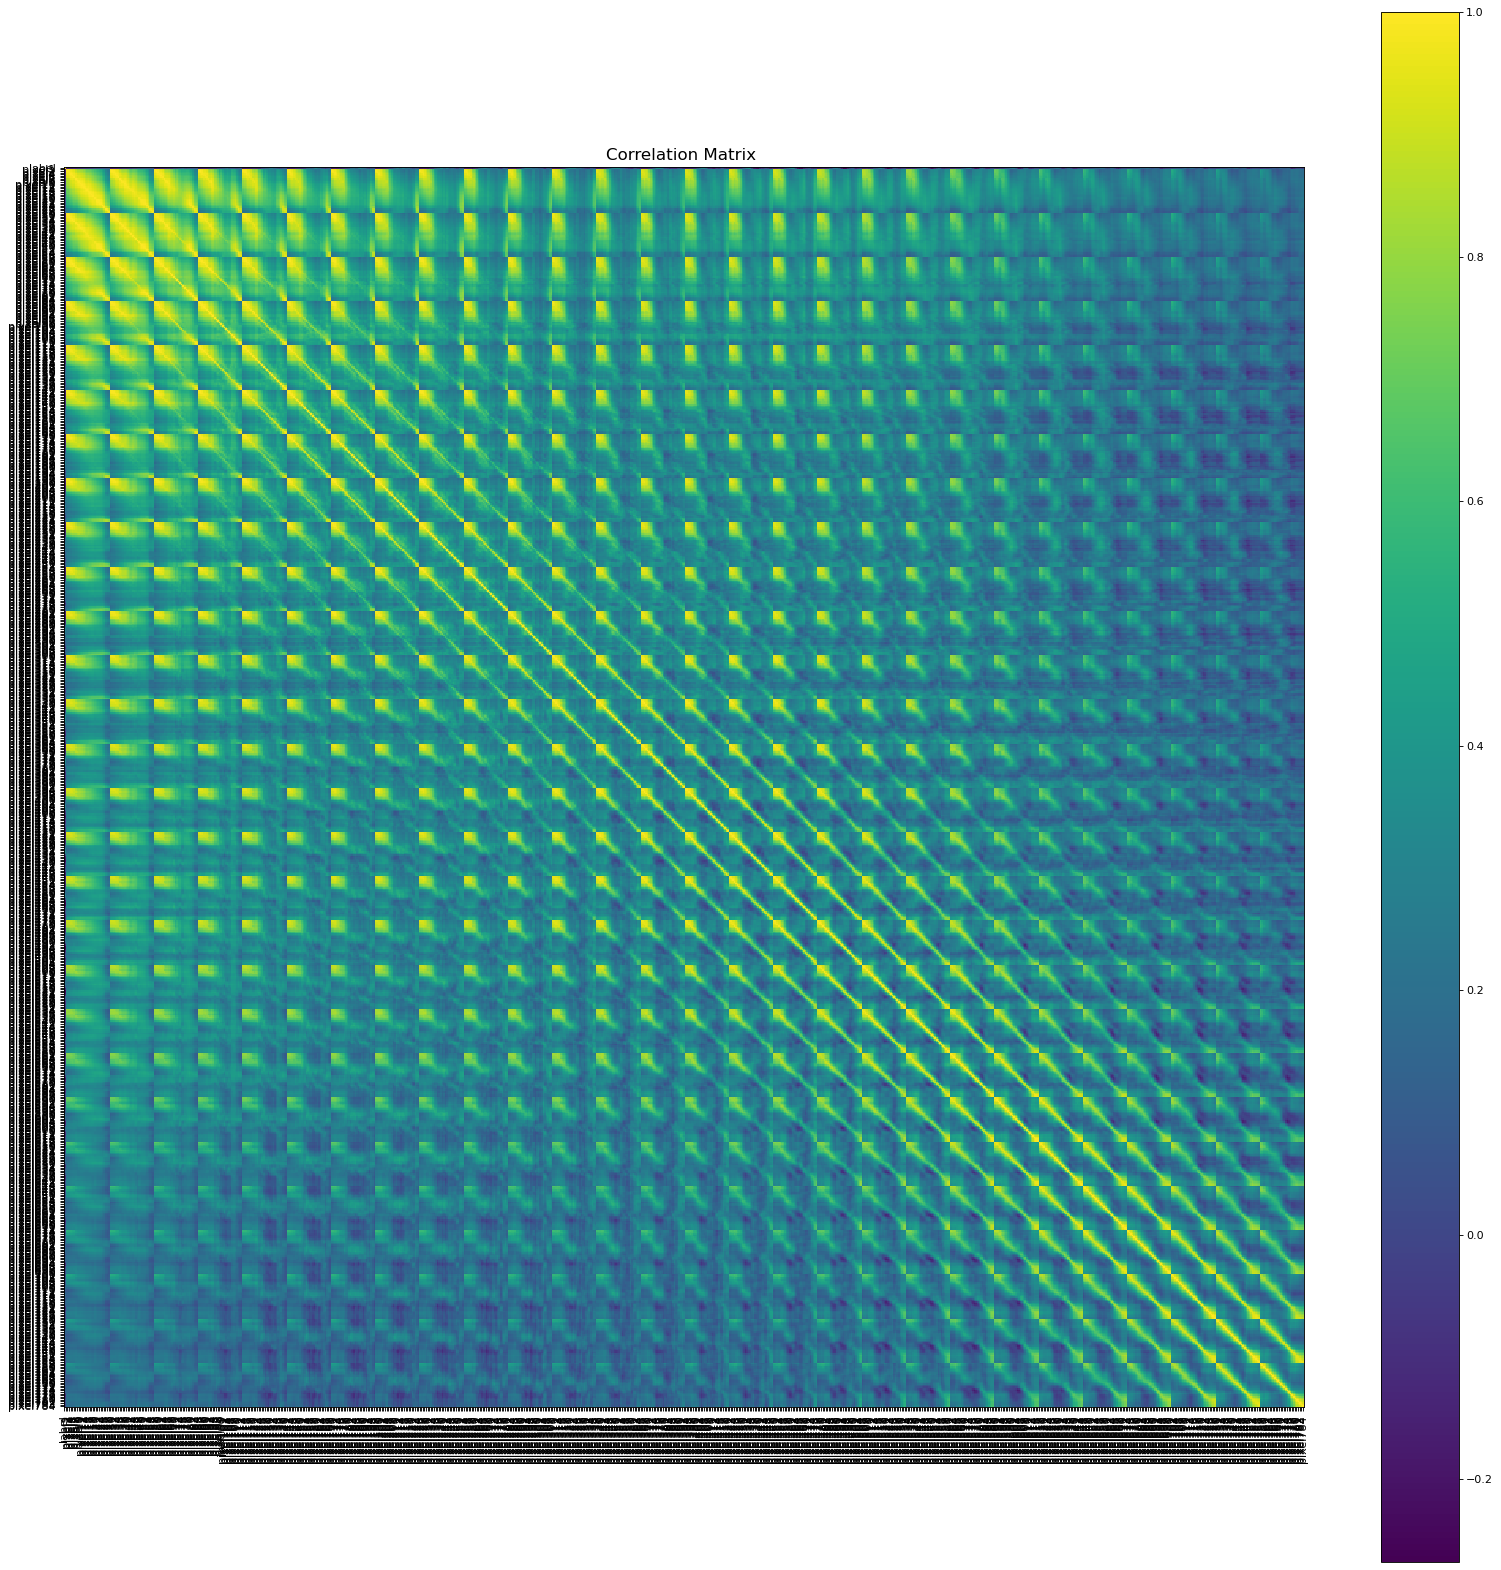

In [16]:
plotCorrelationMatrix(df1, 25)

In [17]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sign_mnist_test.cssign_mnist_test[1].csvv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('sign_mnist_train[1].csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 785 columns


C:\Users\ashis\AppData\Local\Temp\ipykernel_25652\2217798891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


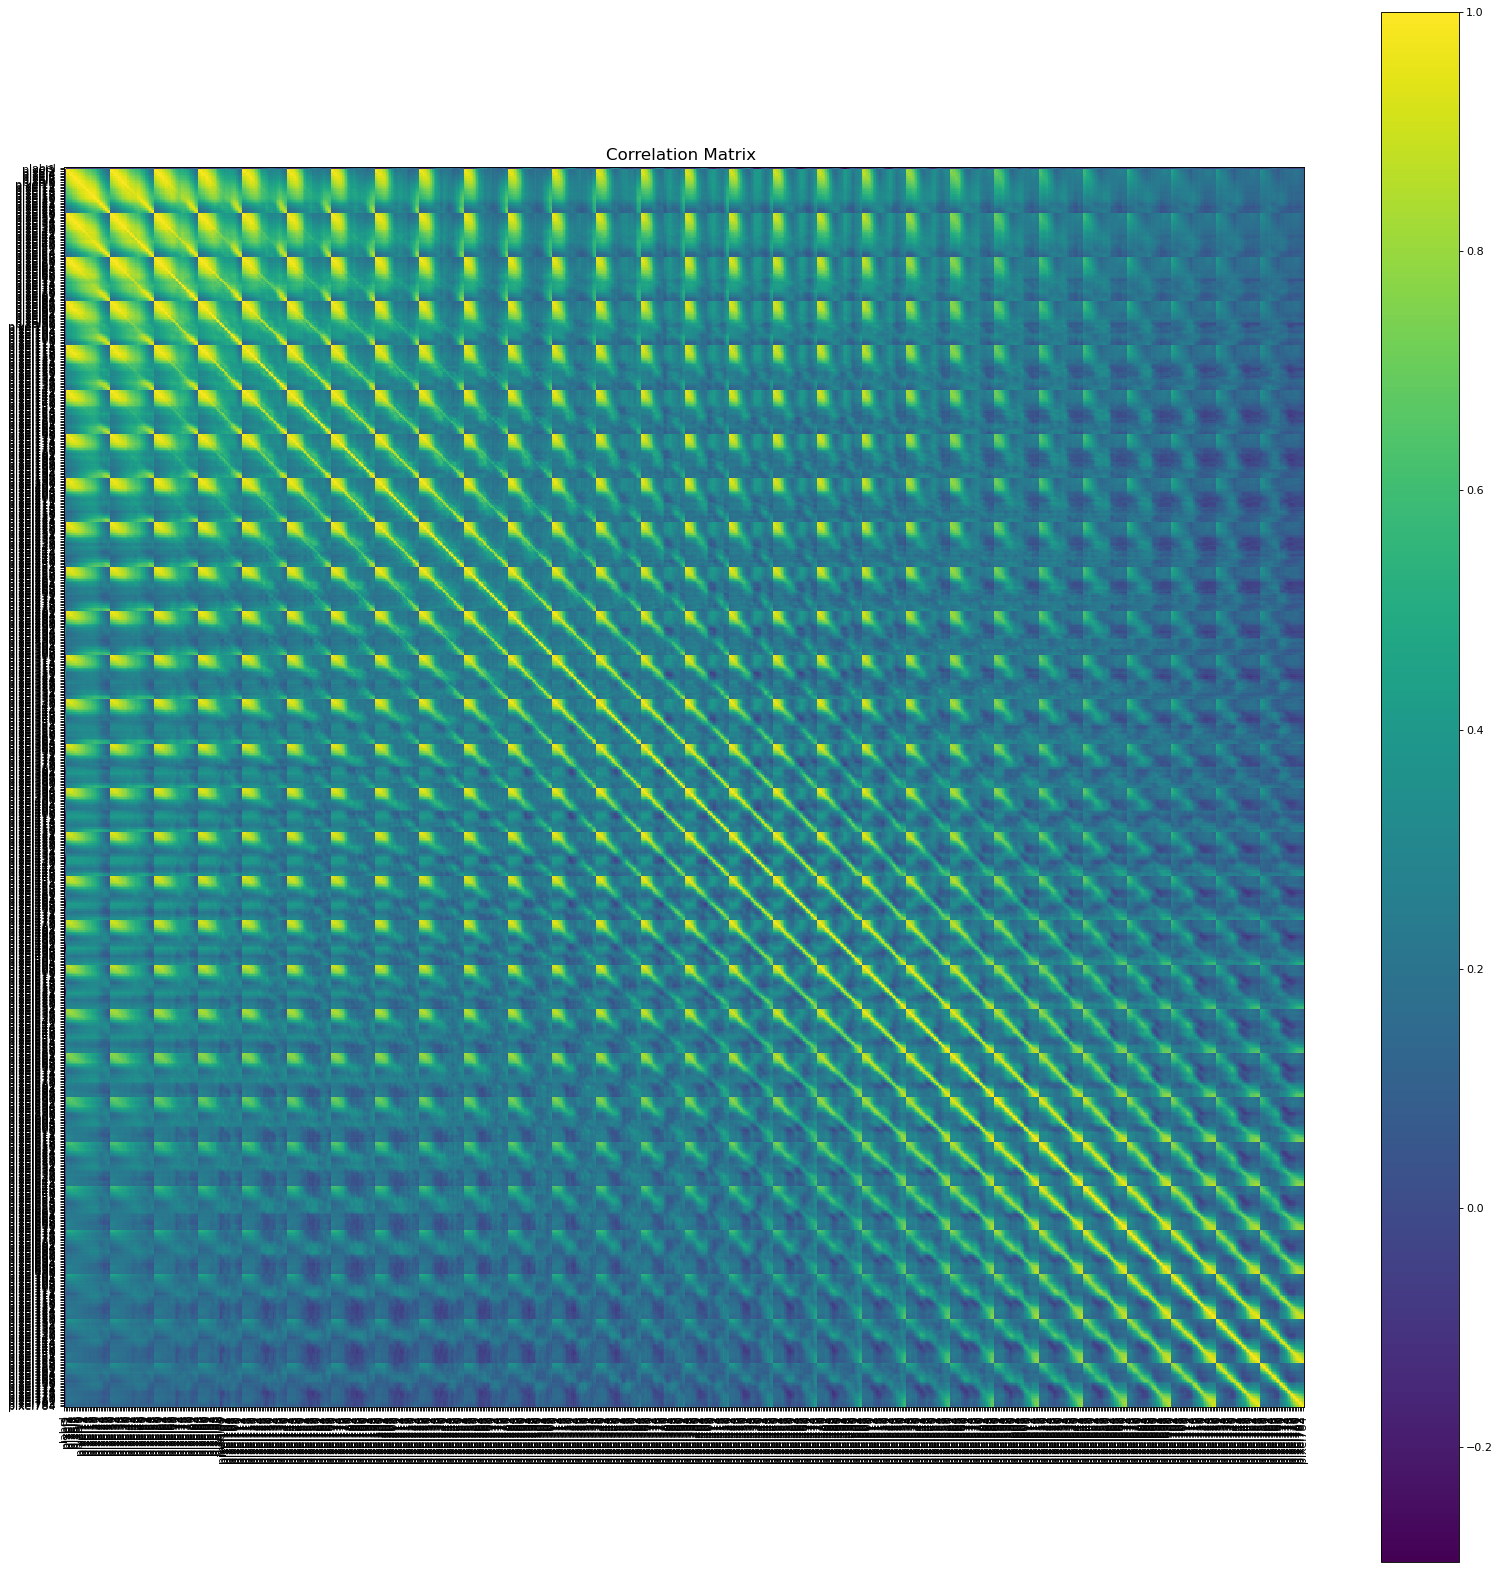

In [18]:
plotCorrelationMatrix(df2, 25)

In [19]:
y = df_train['label'].values
x = df_train.values

#Dropping the dimension 'label' to make as input to labelBinarizer

In [20]:
df_train.drop('label', axis=1, inplace = True)

In [21]:
#lABEL BINARIZER
label_binarizer = LabelBinarizer()
Label = label_binarizer.fit_transform(y)

In [22]:
Label.shape

(27455, 24)

In [23]:
x = df_train.values
x = np.array([np.reshape(i, (28,28)) for i in x])
x = np.array([i.flatten() for i in x])

Displaying Random Image

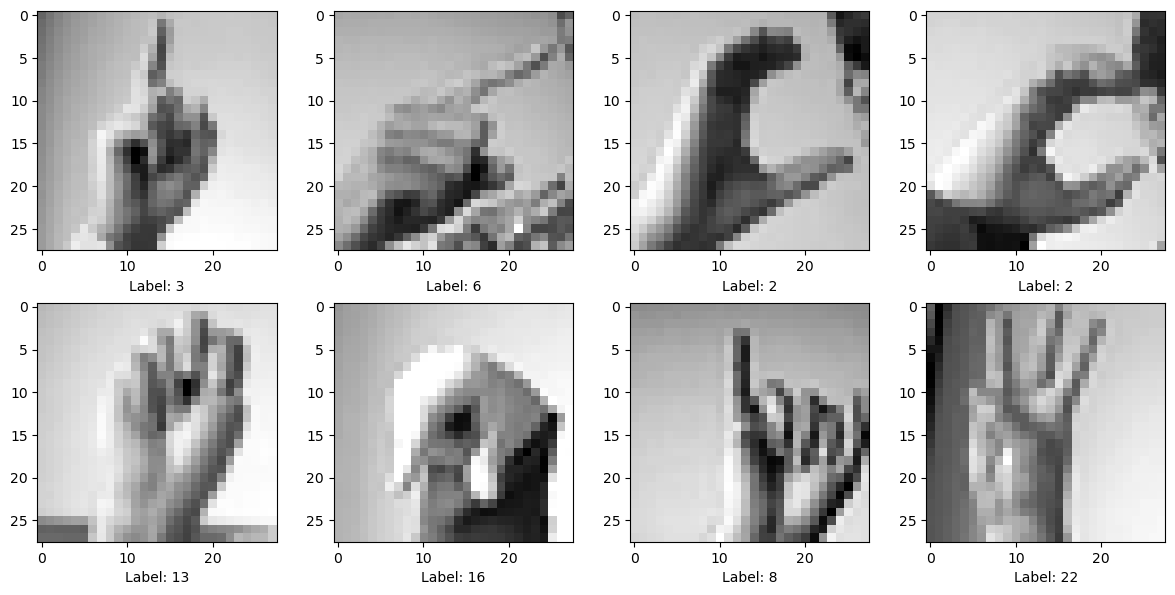

In [24]:
num_rows = 2
num_cols = 4

# Set up the subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Reshape and display each image in the grid
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(x):
            img = x[index].reshape((28, 28))
            ax[i, j].imshow(img, cmap='gray')
            ax[i, j].set_xlabel(f"Label: {y[index]}")  # Assuming y is the label array

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Label, test_size = 0.3, random_state = 101)

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

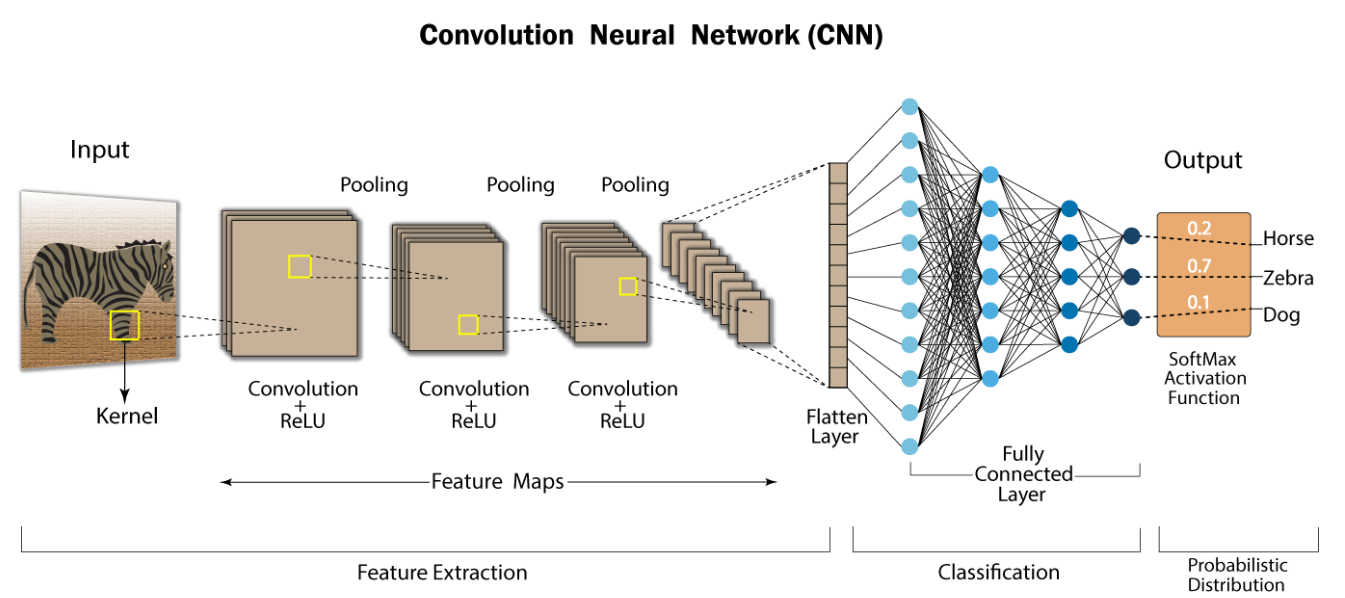

.CNN is used for iamge classification, object detection.

.Feature detector = kernel = filter

.Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.

.feature map = conv(input image, feature detector). Element wise multiplication of matrices. It is the convolved feature.

.Stride = navigating in input image.

.We reduce the size of image. This is important bc code runs faster. However, we lost information.

.We create multiple feature maps bc we use multiple feature detectors(filters).

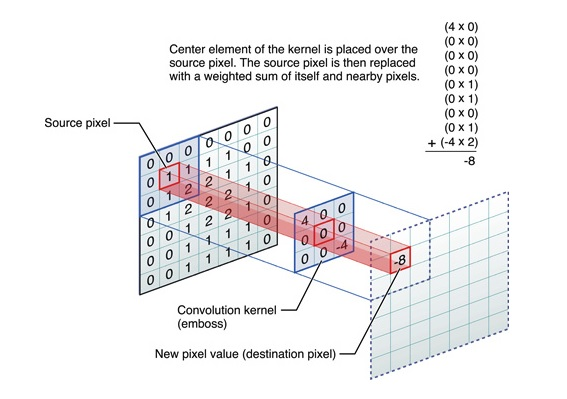

.After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.

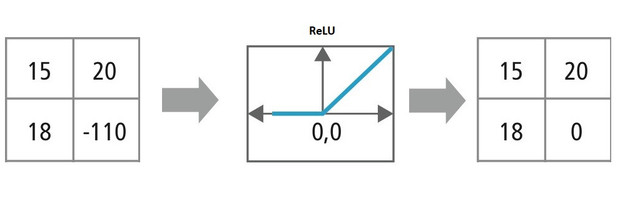

# Same Padding

.As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.

# Max Pooling

.It makes down-sampling or sub-sampling (Reduces the number of parameters)

.It makes the detection of features invariant to scale or orientation changes.

.It reduce the amount of parameters and computation in the network, and hence to also control overfitting.

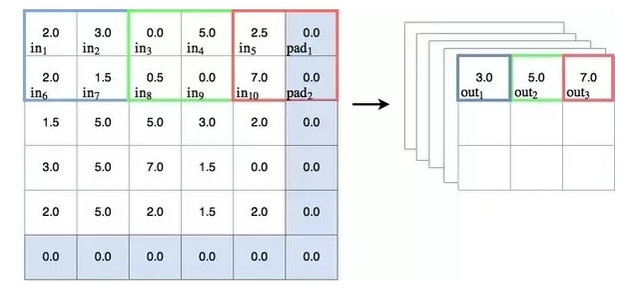

Flattening

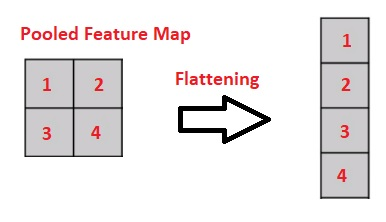

# Full Connection

Artificial Neural Network

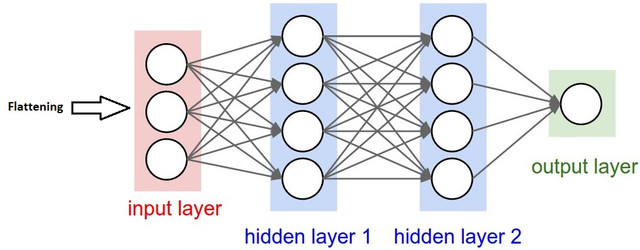

# Network Building

In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(x_train)

In [29]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(24, activation = 'softmax'))

In [30]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=50, batch_size=128)

Epoch 1/50
151/151 [==============================] - 13s 78ms/step - loss: 2.8286 - accuracy: 0.1436 - val_loss: 2.2413 - val_accuracy: 0.2437
Epoch 2/50
151/151 [==============================] - 11s 73ms/step - loss: 1.7468 - accuracy: 0.4293 - val_loss: 1.2530 - val_accuracy: 0.6092
Epoch 3/50
151/151 [==============================] - 11s 75ms/step - loss: 1.1130 - accuracy: 0.6230 - val_loss: 0.8291 - val_accuracy: 0.7151
Epoch 4/50
151/151 [==============================] - 11s 76ms/step - loss: 0.7503 - accuracy: 0.7471 - val_loss: 0.6129 - val_accuracy: 0.7905
Epoch 5/50
151/151 [==============================] - 11s 75ms/step - loss: 0.4834 - accuracy: 0.8374 - val_loss: 0.3697 - val_accuracy: 0.8725
Epoch 6/50
151/151 [==============================] - 12s 77ms/step - loss: 0.3131 - accuracy: 0.8970 - val_loss: 0.2608 - val_accuracy: 0.9210
Epoch 7/50
151/151 [==============================] - 11s 75ms/step - loss: 0.1999 - accuracy: 0.9359 - val_loss: 0.3438 - val_accuracy:

# Model Valuation and Output

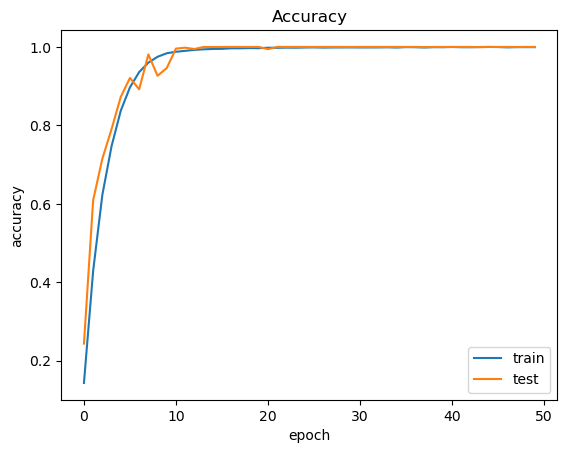

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [33]:
(ls,acc)=model.evaluate(x=x_test,y=y_test)

258/258 [==============================] - 3s 12ms/step - loss: 2.0979e-04 - accuracy: 0.9999


In [34]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.98785853385925%


258/258 [==============================] - 3s 11ms/step


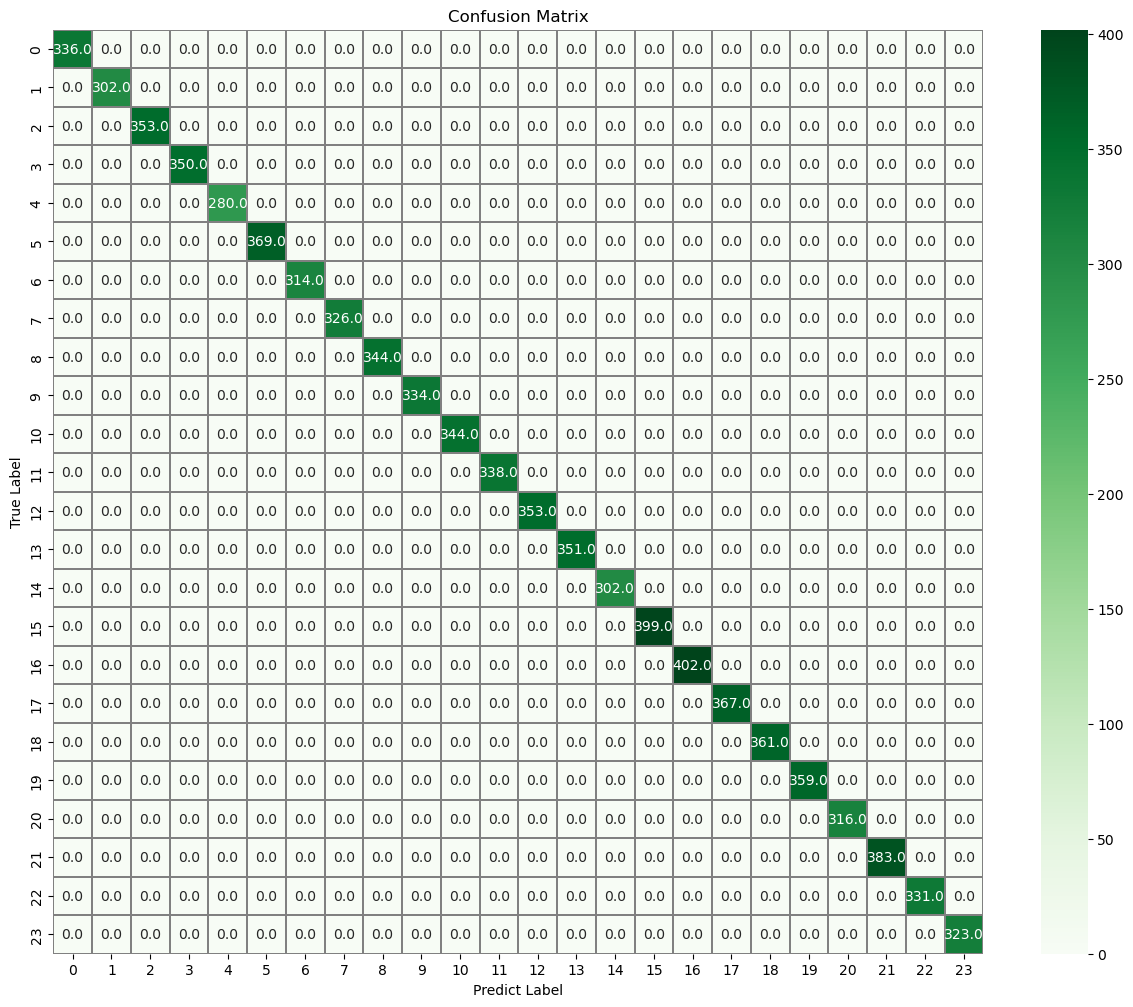

In [35]:
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(y_test, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

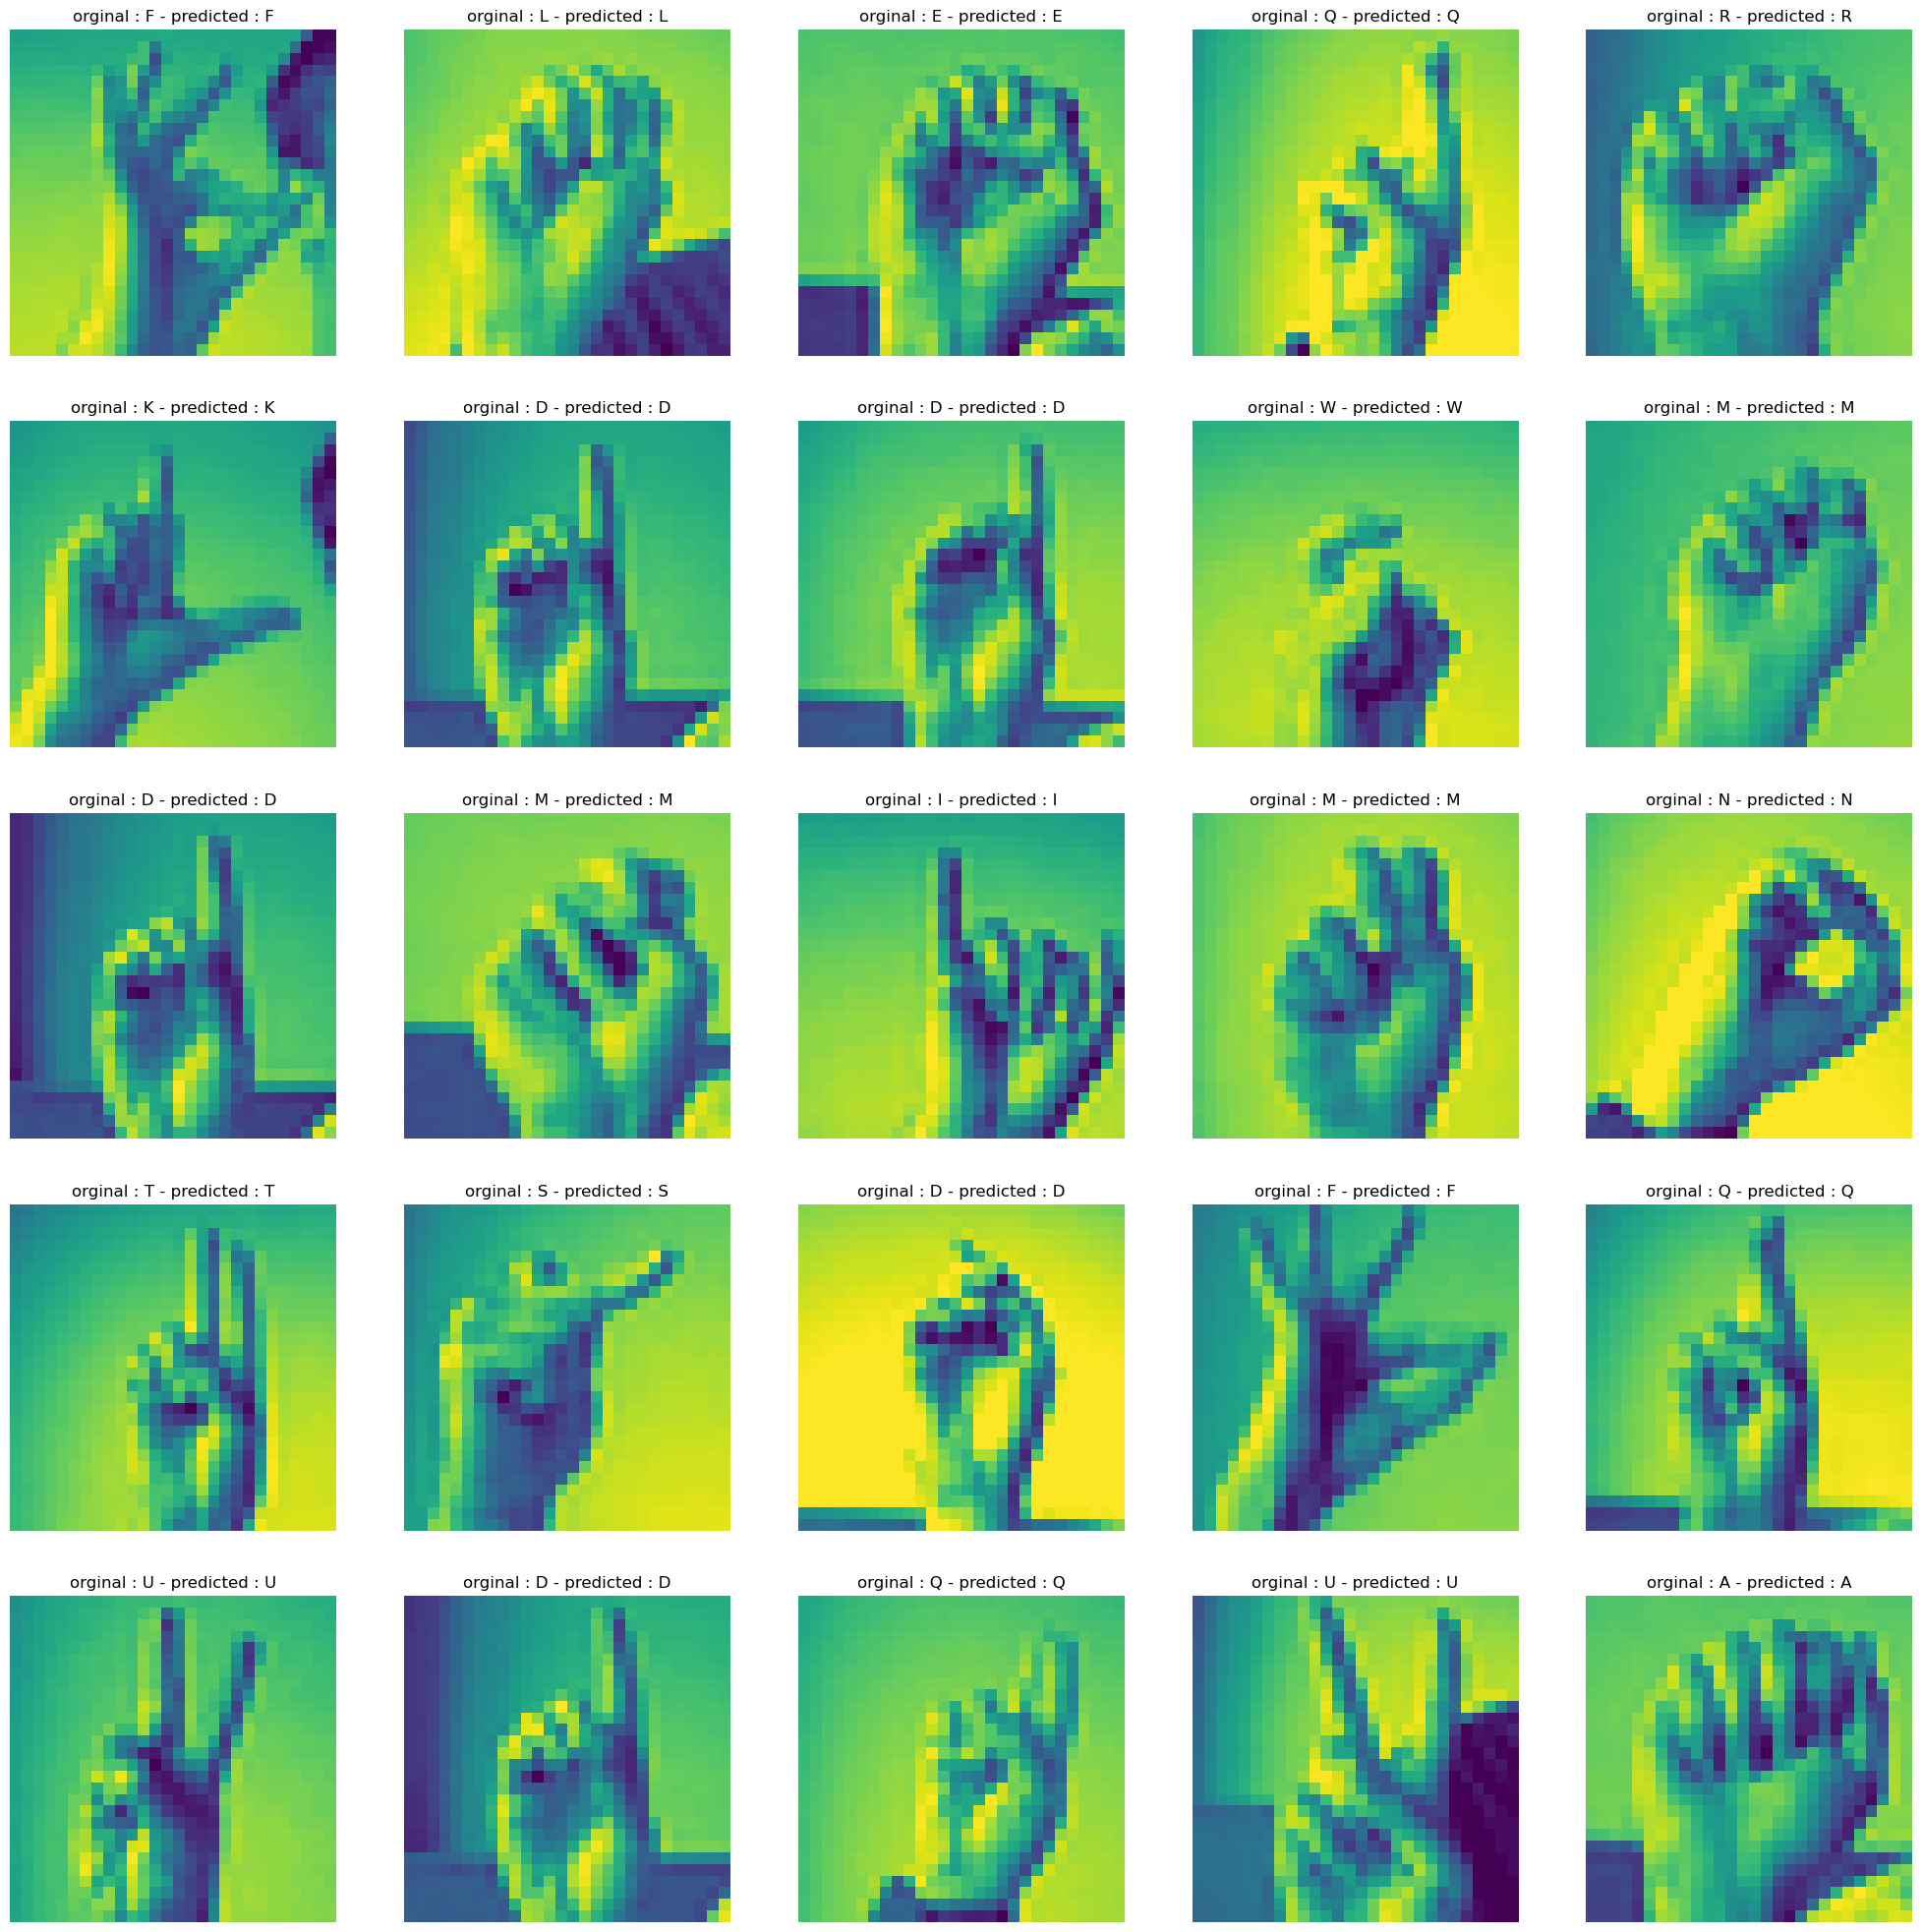

In [37]:
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title("orginal : {} - predicted : {}".format(chr(Y_true[i]+65), chr(Y_pred_classes[i]+65)))
    plt.axis("off")

In [39]:
model.save('64x3-CNN.model.h5')

C:\Users\ashis\anaconda3\null\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
